In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('./simulation_performance_summary.csv')
df = df[df['LiDAR_Noise_Enabled']==True].reset_index(drop=True)

In [62]:
df.head()

,Algorithm,Params,EvaluationMethod,TP,FP,FN,Precision,Recall,F1-Score,GT_Relevant,...,Timestamp,Seed,TotalSimTime,NumInitialObstacles,AgentSpeed,LiDAR_Range,PaddingCells,ClusteringTime_sec,LiDAR_Noise_Enabled,LiDAR_Noise_Level
0,DBSCAN,"{'eps': 1, 'min_samples': 3}, YScl:0.2",3D_IOU,21,17,39,0.553,0.350,0.429,60,...,2025-05-22 13:43:57,1,20.0,60,20,30,1,0.0210,True,0.05
1,HDBSCAN,"{'min_cluster_size': 5, 'min_samples': None, '...",3D_IOU,19,23,41,0.452,0.317,0.373,60,...,2025-05-22 13:43:57,1,20.0,60,20,30,1,0.0761,True,0.05
2,KMEANS,"{'n_clusters': 60, 'random_state': 1, 'n_init'...",3D_IOU,13,41,47,0.241,0.217,0.228,60,...,2025-05-22 13:43:57,1,20.0,60,20,30,1,0.1268,True,0.05
3,GMM,"{'n_components': 60, 'covariance_type': 'full'...",3D_IOU,16,27,44,0.372,0.267,0.311,60,...,2025-05-22 13:43:57,1,20.0,60,20,30,1,0.5174,True,0.05
4,DBSCAN,"{'eps': 1, 'min_samples': 3}, YScl:0.2",2D_CENTER_IN_GT_AREA,37,1,23,0.974,0.617,0.755,60,...,2025-05-22 13:43:57,1,20.0,60,20,30,1,0.0166,True,0.05


In [63]:
df.columns

Index(['Algorithm', 'Params', 'EvaluationMethod', 'TP', 'FP', 'FN',
       'Precision', 'Recall', 'F1-Score', 'GT_Relevant', 'Predicted_Boxes',
       'Timestamp', 'Seed', 'TotalSimTime', 'NumInitialObstacles',
       'AgentSpeed', 'LiDAR_Range', 'PaddingCells', 'ClusteringTime_sec',
       'LiDAR_Noise_Enabled', 'LiDAR_Noise_Level'],
      dtype='object')

In [64]:
df1 = df[['Algorithm','EvaluationMethod','TP','FP','FN','Precision','Recall','F1-Score','GT_Relevant','Predicted_Boxes','ClusteringTime_sec','LiDAR_Noise_Enabled']]

In [65]:
df1

,Algorithm,EvaluationMethod,TP,FP,FN,Precision,Recall,F1-Score,GT_Relevant,Predicted_Boxes,ClusteringTime_sec,LiDAR_Noise_Enabled
0,DBSCAN,3D_IOU,21,17,39,0.553,0.350,0.429,60,38,0.0210,True
1,HDBSCAN,3D_IOU,19,23,41,0.452,0.317,0.373,60,42,0.0761,True
2,KMEANS,3D_IOU,13,41,47,0.241,0.217,0.228,60,54,0.1268,True
3,GMM,3D_IOU,16,27,44,0.372,0.267,0.311,60,43,0.5174,True
4,DBSCAN,2D_CENTER_IN_GT_AREA,37,1,23,0.974,0.617,0.755,60,38,0.0166,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1763,GMM,2D_CENTER_IN_GT_AREA,22,6,44,0.786,0.333,0.468,66,28,0.3081,True
1764,DBSCAN,2D_AREA_OVERLAP_RATIO,21,5,45,0.808,0.318,0.457,66,26,0.0075,True
1765,HDBSCAN,2D_AREA_OVERLAP_RATIO,24,2,42,0.923,0.364,0.522,66,26,0.0280,True
1766,KMEANS,2D_AREA_OVERLAP_RATIO,20,20,46,0.500,0.303,0.377,66,40,0.0167,True


In [66]:
performance_summary = df.groupby('EvaluationMethod').agg(
    Avg_F1_Score=('F1-Score', 'mean'),
    Avg_Precision=('Precision', 'mean'),
    Avg_Recall=('Recall', 'mean')
).sort_values(by='Avg_F1_Score', ascending=False) # F1-Score 기준으로 정렬 (다른 기준으로 변경 가능)

print("--- EvaluationMethod별 평균 성능 지표 (F1, Precision, Recall) ---")
print(performance_summary)
print("\n")

--- EvaluationMethod별 평균 성능 지표 (F1, Precision, Recall) ---
                       Avg_F1_Score  Avg_Precision  Avg_Recall
EvaluationMethod                                              
2D_CENTER_IN_GT_AREA       0.551095       0.794935    0.436204
2D_AREA_OVERLAP_RATIO      0.542391       0.776383    0.430612
3D_IOU                     0.173265       0.248752    0.137345




In [67]:
display(performance_summary)

# 2D_AREA_OVERLAP_RATIO가 정확히 나와.

,Avg_F1_Score,Avg_Precision,Avg_Recall
EvaluationMethod,,,
2D_CENTER_IN_GT_AREA,0.551095,0.794935,0.436204
2D_AREA_OVERLAP_RATIO,0.542391,0.776383,0.430612
3D_IOU,0.173265,0.248752,0.137345


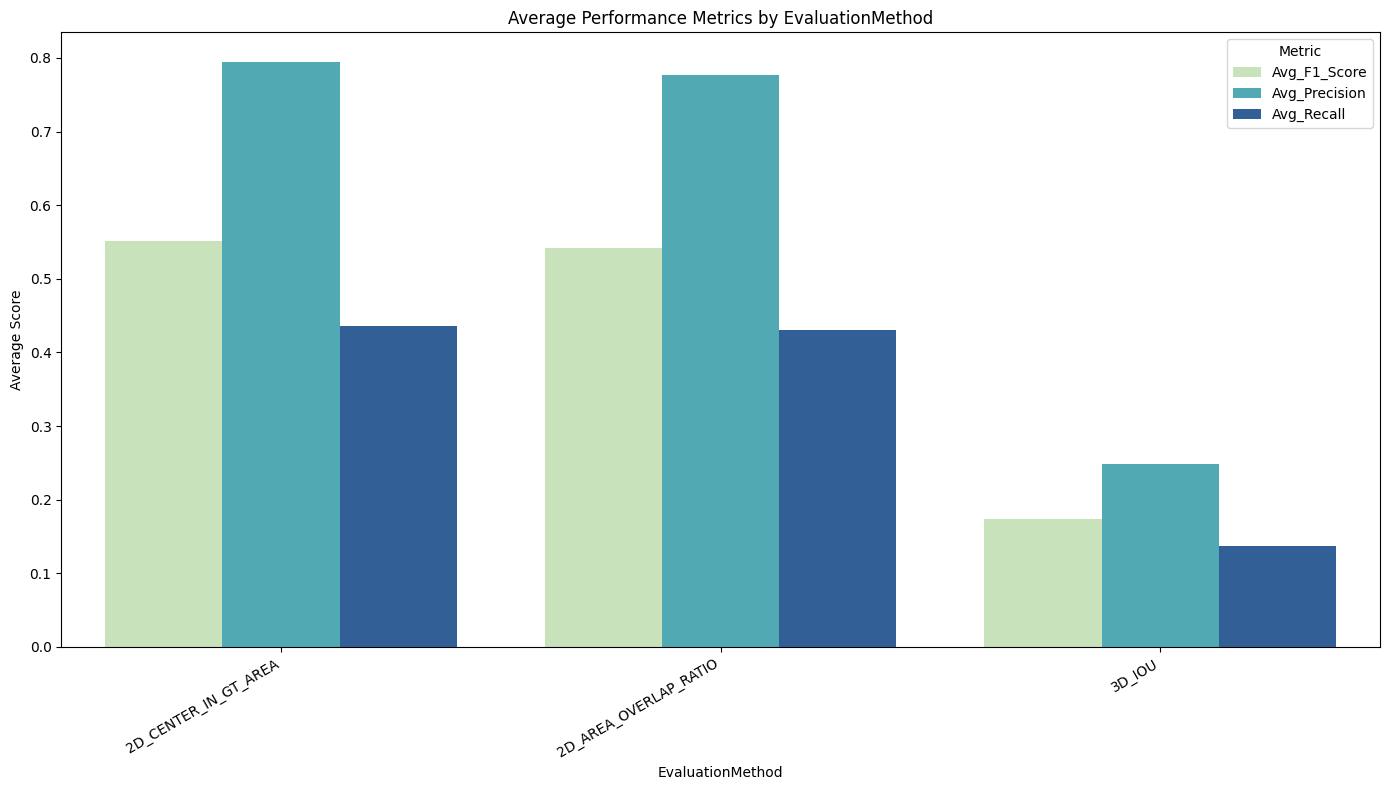

In [68]:
# 시각화를 위해 데이터프레임 형태를 살짝 변경 (melt 사용)
performance_summary_reset = performance_summary.reset_index() # EvaluationMethod를 컬럼으로 변경
performance_melted = performance_summary_reset.melt(
    id_vars='EvaluationMethod', # 기준이 될 컬럼
    value_vars=['Avg_F1_Score', 'Avg_Precision', 'Avg_Recall'], # 값으로 사용할 컬럼들
    var_name='Metric', # 새로운 컬럼명 (지표 종류)
    value_name='Score'  # 새로운 컬럼명 (지표 값)
)

plt.figure(figsize=(14, 8))
sns.barplot(x='EvaluationMethod', y='Score', hue='Metric', data=performance_melted, palette='YlGnBu',
            order=performance_summary.index) # 정렬 순서 유지
plt.title('Average Performance Metrics by EvaluationMethod')
plt.xlabel('EvaluationMethod')
plt.ylabel('Average Score')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [87]:
# '2D_AREA_OVERLAP_RATIO' 평가 방법에 해당하는 데이터만 필터링
df_target_method = df1[df1['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO'].copy()
df_target_method = df_target_method[df_target_method['LiDAR_Noise_Enabled'] == True]

In [88]:
df_target_method

,Algorithm,EvaluationMethod,TP,FP,FN,Precision,Recall,F1-Score,GT_Relevant,Predicted_Boxes,ClusteringTime_sec,LiDAR_Noise_Enabled
8,DBSCAN,2D_AREA_OVERLAP_RATIO,36,2,24,0.947,0.600,0.735,60,38,0.0172,True
9,HDBSCAN,2D_AREA_OVERLAP_RATIO,36,6,24,0.857,0.600,0.706,60,42,0.0654,True
10,KMEANS,2D_AREA_OVERLAP_RATIO,37,17,23,0.685,0.617,0.649,60,54,0.0188,True
11,GMM,2D_AREA_OVERLAP_RATIO,37,6,23,0.860,0.617,0.718,60,43,0.5310,True
20,DBSCAN,2D_AREA_OVERLAP_RATIO,32,2,27,0.941,0.542,0.688,59,34,0.0122,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1755,GMM,2D_AREA_OVERLAP_RATIO,13,17,52,0.433,0.200,0.274,65,30,0.2266,True
1764,DBSCAN,2D_AREA_OVERLAP_RATIO,21,5,45,0.808,0.318,0.457,66,26,0.0075,True
1765,HDBSCAN,2D_AREA_OVERLAP_RATIO,24,2,42,0.923,0.364,0.522,66,26,0.0280,True
1766,KMEANS,2D_AREA_OVERLAP_RATIO,20,20,46,0.500,0.303,0.377,66,40,0.0167,True


In [89]:
df1[(df1['Algorithm'] == 'DBSCAN')&(df1['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO')]

,Algorithm,EvaluationMethod,TP,FP,FN,Precision,Recall,F1-Score,GT_Relevant,Predicted_Boxes,ClusteringTime_sec,LiDAR_Noise_Enabled
8,DBSCAN,2D_AREA_OVERLAP_RATIO,36,2,24,0.947,0.600,0.735,60,38,0.0172,True
20,DBSCAN,2D_AREA_OVERLAP_RATIO,32,2,27,0.941,0.542,0.688,59,34,0.0122,True
32,DBSCAN,2D_AREA_OVERLAP_RATIO,31,5,29,0.861,0.517,0.646,60,36,0.0197,True
44,DBSCAN,2D_AREA_OVERLAP_RATIO,30,5,29,0.857,0.508,0.638,59,35,0.0101,True
56,DBSCAN,2D_AREA_OVERLAP_RATIO,36,5,23,0.878,0.610,0.720,59,41,0.0281,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1716,DBSCAN,2D_AREA_OVERLAP_RATIO,16,1,44,0.941,0.267,0.416,60,17,0.0052,True
1728,DBSCAN,2D_AREA_OVERLAP_RATIO,12,1,35,0.923,0.255,0.400,47,13,0.0070,True
1740,DBSCAN,2D_AREA_OVERLAP_RATIO,13,1,32,0.929,0.289,0.441,45,14,0.0060,True
1752,DBSCAN,2D_AREA_OVERLAP_RATIO,12,7,53,0.632,0.185,0.286,65,19,0.0079,True


In [90]:
df1[(df1['Algorithm'] == 'HDBSCAN')&(df1['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO')]
df_DBSCAN = df1[(df1['Algorithm'] == 'DBSCAN')&(df1['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO')]
df_HDBSCAN = df1[(df1['Algorithm'] == 'HDBSCAN')&(df1['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO')]

In [91]:
print(df_DBSCAN['F1-Score'].mean(), df_HDBSCAN['F1-Score'].mean())

0.5453945578231293 0.5671156462585034


In [92]:
print(df_DBSCAN[df_DBSCAN['LiDAR_Noise_Enabled'] ==True]['Precision'].mean(), df_HDBSCAN[df_HDBSCAN['LiDAR_Noise_Enabled'] ==True]['Precision'].mean())

0.8752789115646258 0.8706598639455781


In [93]:
if df_target_method.empty:
    print("데이터프레임에 '2D_AREA_OVERLAP_RATIO' 평가 방법에 대한 데이터가 없습니다.")
else:
    print("--- '2D_AREA_OVERLAP_RATIO' 평가 방법 데이터 ---")
    print(df_target_method)
    print("\n")

    # 2. 필터링된 데이터 내에서 Algorithm별 평균 성능 지표 계산
    # (GT_Relevant 값도 함께 고려하여 그룹화. 만약 이 평가방법 내 GT_Relevant가 항상 같다면 Algorithm만으로 그룹화해도 무방)
    algo_performance = df_target_method.groupby(['Algorithm', 'GT_Relevant']).agg(
        Avg_F1_Score=('F1-Score', 'mean'),
        Avg_Precision=('Precision', 'mean'),
        Avg_Recall=('Recall', 'mean'),
        Count=('Algorithm', 'size') # 각 그룹의 데이터 개수 확인
    ).sort_values(by='Avg_F1_Score', ascending=False)

    # 만약 GT_Relevant 값이 이 평가 방법 내에서 항상 동일하다면, 아래와 같이 Algorithm만으로 그룹화 가능
    # algo_performance_simple = df_target_method.groupby('Algorithm').agg(
    #     Avg_F1_Score=('F1-Score', 'mean'),
    #     Avg_Precision=('Precision', 'mean'),
    #     Avg_Recall=('Recall', 'mean')
    # ).sort_values(by='Avg_F1_Score', ascending=False)
    # print("--- '2D_AREA_OVERLAP_RATIO' 내 Algorithm별 평균 성능 (단순) ---")
    # print(algo_performance_simple)
    # print("\n")


    print(f"--- '2D_AREA_OVERLAP_RATIO' 내 Algorithm별 평균 성능 (GT_Relevant 고려) ---")
    display(algo_performance)
    print("\n")

   

--- '2D_AREA_OVERLAP_RATIO' 평가 방법 데이터 ---
     Algorithm       EvaluationMethod  TP  FP  FN  Precision  Recall  \
8       DBSCAN  2D_AREA_OVERLAP_RATIO  36   2  24      0.947   0.600   
9      HDBSCAN  2D_AREA_OVERLAP_RATIO  36   6  24      0.857   0.600   
10      KMEANS  2D_AREA_OVERLAP_RATIO  37  17  23      0.685   0.617   
11         GMM  2D_AREA_OVERLAP_RATIO  37   6  23      0.860   0.617   
20      DBSCAN  2D_AREA_OVERLAP_RATIO  32   2  27      0.941   0.542   
...        ...                    ...  ..  ..  ..        ...     ...   
1755       GMM  2D_AREA_OVERLAP_RATIO  13  17  52      0.433   0.200   
1764    DBSCAN  2D_AREA_OVERLAP_RATIO  21   5  45      0.808   0.318   
1765   HDBSCAN  2D_AREA_OVERLAP_RATIO  24   2  42      0.923   0.364   
1766    KMEANS  2D_AREA_OVERLAP_RATIO  20  20  46      0.500   0.303   
1767       GMM  2D_AREA_OVERLAP_RATIO  13  15  53      0.464   0.197   

      F1-Score  GT_Relevant  Predicted_Boxes  ClusteringTime_sec  \
8        0.735           

Avg_F1_Score  Avg_Precision  Avg_Recall  Count
Algorithm GT_Relevant                                                
GMM       70                  0.908         0.9830      0.8430      1
KMEANS    70                  0.908         0.9830      0.8430      1
DBSCAN    70                  0.899         0.9830      0.8290      1
HDBSCAN   70                  0.812         0.8570      0.7710      1
          79                  0.748         0.9420      0.6200      1
...                             ...            ...         ...    ...
GMM       19                  0.294         0.5500      0.2105      2
DBSCAN    19                  0.287         0.5165      0.2105      2
          24                  0.286         1.0000      0.1670      1
KMEANS    24                  0.121         0.2220      0.0830      1
GMM       24                  0.067         0.1670      0.0420      1

[196 rows x 4 columns]

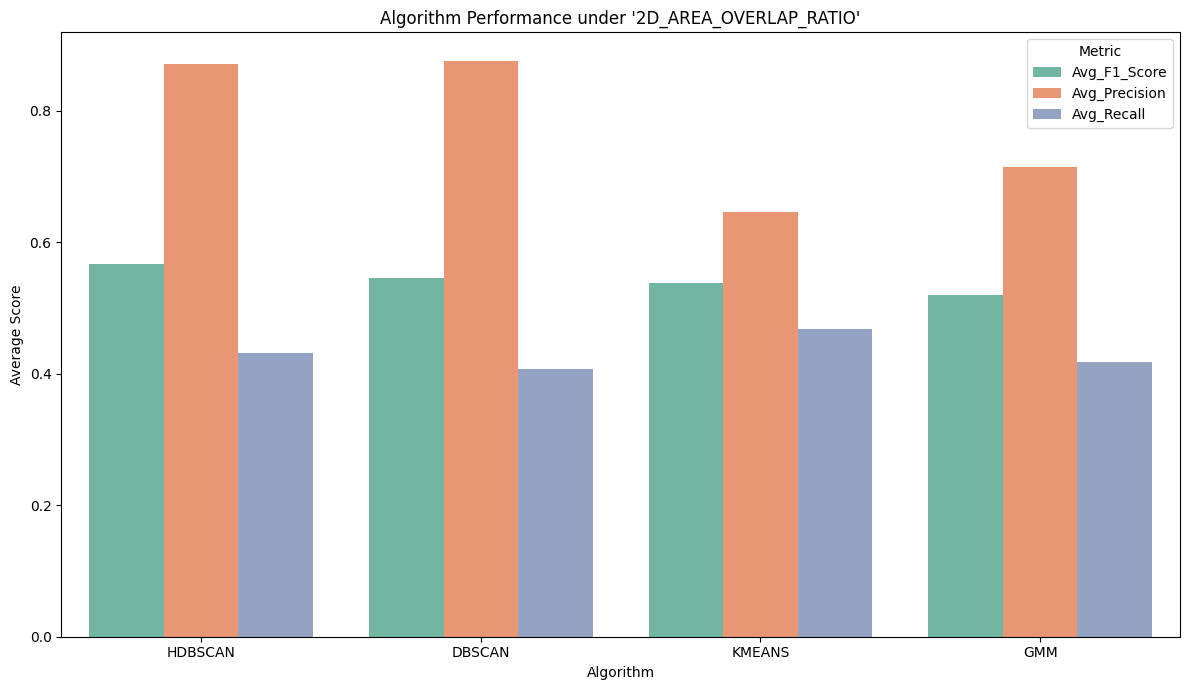

In [94]:
 # 3. 시각화: Algorithm별 성능 비교 (그룹형 막대 차트)
    # 시각화를 위해 GT_Relevant를 제외하고 Algorithm 만으로 그룹화한 데이터를 사용하거나,
    # GT_Relevant 별로 구분해서 표시할 수 있습니다.
    # 여기서는 Algorithm 만으로 그룹화하여 시각화합니다. (위의 algo_performance_simple과 유사)
    
    # 시각화를 위한 데이터 준비 (Algorithm별 평균)
algo_perf_for_plot = df_target_method.groupby('Algorithm').agg(
    Avg_F1_Score=('F1-Score', 'mean'),
    Avg_Precision=('Precision', 'mean'),
    Avg_Recall=('Recall', 'mean')
).reset_index() # Algorithm을 컬럼으로 변경

if not algo_perf_for_plot.empty:
    algo_perf_melted = algo_perf_for_plot.melt(
        id_vars='Algorithm',
        value_vars=['Avg_F1_Score', 'Avg_Precision', 'Avg_Recall'],
        var_name='Metric',
        value_name='Score'
    )

    plt.figure(figsize=(12, 7))
    # F1-Score가 높은 순으로 알고리즘 정렬
    algo_order = algo_perf_for_plot.sort_values('Avg_F1_Score', ascending=False)['Algorithm']
    sns.barplot(x='Algorithm', y='Score', hue='Metric', data=algo_perf_melted, palette='Set2', order=algo_order)
    plt.title("Algorithm Performance under '2D_AREA_OVERLAP_RATIO'")
    plt.xlabel('Algorithm')
    plt.ylabel('Average Score')
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()
else:
    print("시각화할 데이터가 없습니다 (필터링된 데이터가 비어있을 수 있습니다).")


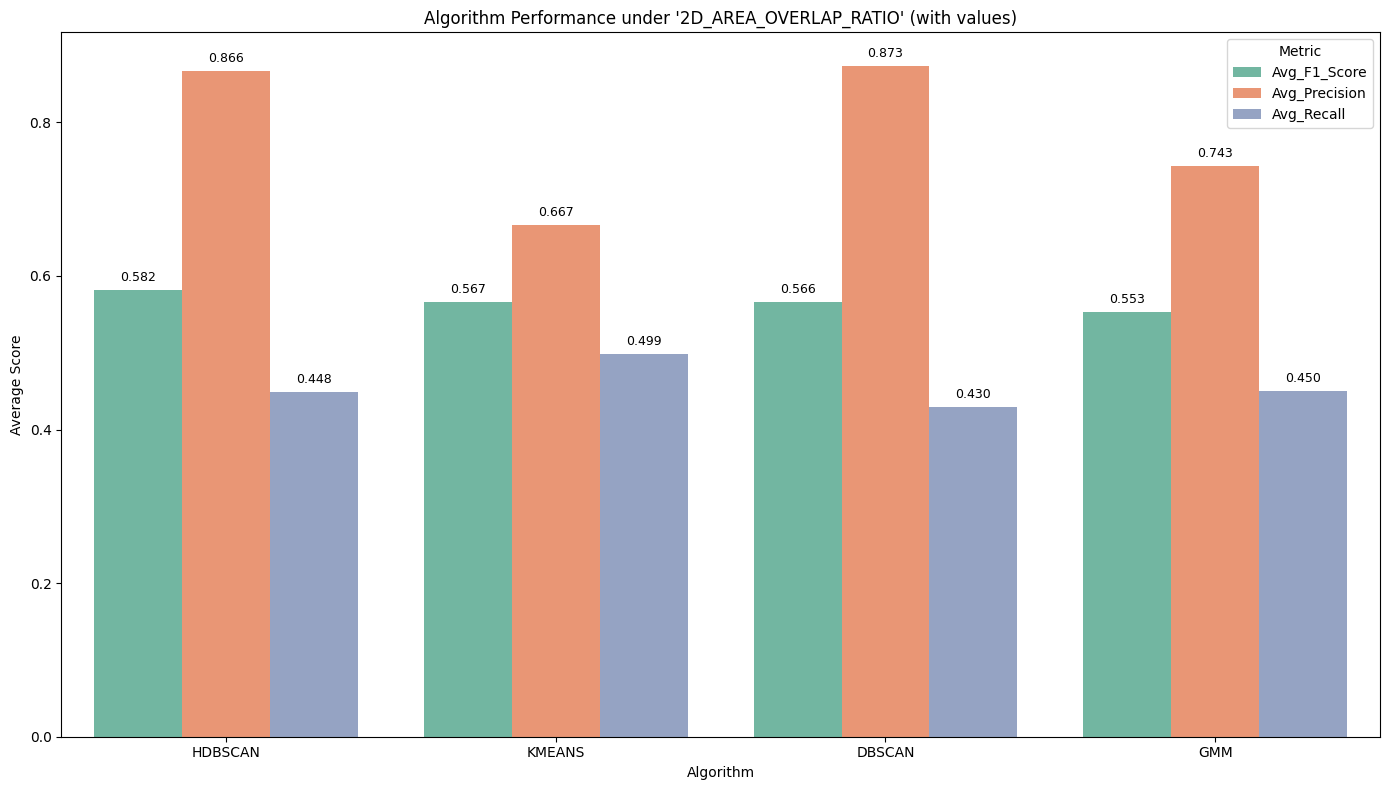

In [95]:
# '2D_AREA_OVERLAP_RATIO' 평가 방법에 해당하는 데이터만 필터링
df_target_method = df[df['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO'].copy()

if df_target_method.empty:
    print("데이터프레임에 '2D_AREA_OVERLAP_RATIO' 평가 방법에 대한 데이터가 없습니다.")
else:
    # 시각화를 위한 데이터 준비 (Algorithm별 평균)
    algo_perf_for_plot = df_target_method.groupby('Algorithm').agg(
        Avg_F1_Score=('F1-Score', 'mean'),
        Avg_Precision=('Precision', 'mean'),
        Avg_Recall=('Recall', 'mean')
    ).reset_index()

    if not algo_perf_for_plot.empty:
        algo_perf_melted = algo_perf_for_plot.melt(
            id_vars='Algorithm',
            value_vars=['Avg_F1_Score', 'Avg_Precision', 'Avg_Recall'],
            var_name='Metric',
            value_name='Score'
        )

        plt.figure(figsize=(14, 8)) # 차트 크기 약간 조정
        
        # F1-Score가 높은 순으로 알고리즘 정렬
        algo_order = algo_perf_for_plot.sort_values('Avg_F1_Score', ascending=False)['Algorithm']
        
        # 막대 그래프 생성 및 Axes 객체 저장
        ax = sns.barplot(x='Algorithm', y='Score', hue='Metric', data=algo_perf_melted, palette='Set2', order=algo_order)

        # 각 막대 위에 수치 표시하는 부분 추가
        for p in ax.patches:
            # p.get_height()는 막대의 높이 (즉, 값)
            # p.get_x()는 막대의 x축 시작 위치
            # p.get_width()는 막대의 너비
            if p.get_height() > 0: # 높이가 0보다 큰 경우에만 표시 (음수 값 등 예외 처리)
                ax.annotate(f"{p.get_height():.3f}",  # 표시할 텍스트 (소수점 3자리까지)
                            (p.get_x() + p.get_width() / 2., p.get_height()),  # 텍스트 위치 (x, y) - 막대 중앙 상단
                            ha='center', va='center',  # 수평/수직 정렬
                            xytext=(0, 9),  # 텍스트 오프셋 (막대 상단에서 위로 9포인트)
                            textcoords='offset points',
                            fontsize=9) # 폰트 크기

        plt.title("Algorithm Performance under '2D_AREA_OVERLAP_RATIO' (with values)")
        plt.xlabel('Algorithm')
        plt.ylabel('Average Score')
        plt.legend(title='Metric', loc='upper right') # 범례 위치 (필요시 'best' 등으로 자동 조정)
        plt.tight_layout() # 레이아웃 자동 조정
        plt.show()
    else:
        print("시각화할 데이터가 없습니다 (필터링된 데이터가 비어있을 수 있습니다).")


In [78]:
df3= df1[df1['ClusteringTime_sec'].notnull()]
df3

,Algorithm,EvaluationMethod,TP,FP,FN,Precision,Recall,F1-Score,GT_Relevant,Predicted_Boxes,ClusteringTime_sec,LiDAR_Noise_Enabled
0,DBSCAN,3D_IOU,21,17,39,0.553,0.350,0.429,60,38,0.0210,True
1,HDBSCAN,3D_IOU,19,23,41,0.452,0.317,0.373,60,42,0.0761,True
2,KMEANS,3D_IOU,13,41,47,0.241,0.217,0.228,60,54,0.1268,True
3,GMM,3D_IOU,16,27,44,0.372,0.267,0.311,60,43,0.5174,True
4,DBSCAN,2D_CENTER_IN_GT_AREA,37,1,23,0.974,0.617,0.755,60,38,0.0166,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1763,GMM,2D_CENTER_IN_GT_AREA,22,6,44,0.786,0.333,0.468,66,28,0.3081,True
1764,DBSCAN,2D_AREA_OVERLAP_RATIO,21,5,45,0.808,0.318,0.457,66,26,0.0075,True
1765,HDBSCAN,2D_AREA_OVERLAP_RATIO,24,2,42,0.923,0.364,0.522,66,26,0.0280,True
1766,KMEANS,2D_AREA_OVERLAP_RATIO,20,20,46,0.500,0.303,0.377,66,40,0.0167,True


In [79]:
df3[df3['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO'].groupby(by = 'Algorithm')['ClusteringTime_sec'].mean()

Algorithm
DBSCAN     0.010409
GMM        0.250333
HDBSCAN    0.035616
KMEANS     0.015638
Name: ClusteringTime_sec, dtype: float64

#  여기서부터 다시 분석 시작
### 분석 Point
- 전차가 지나간 궤적에서 탐지된 것 장애물 개수(N) :TP+FP
- FP가 적어야 할것
-  TP/TP+FP  
- 그게 Precision


In [80]:
df = pd.read_csv('./simulation_performance_summary.csv')
df = df[df['LiDAR_Noise_Enabled']==True].reset_index(drop=True)
df1 = df[['Algorithm','EvaluationMethod','TP','FP','FN','Precision','Recall','F1-Score','GT_Relevant','Predicted_Boxes','ClusteringTime_sec','LiDAR_Noise_Enabled']]

In [81]:
df1[(df1['Algorithm'] == 'HDBSCAN')&(df1['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO')]
df_DBSCAN = df1[(df1['Algorithm'] == 'DBSCAN')&(df1['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO')]
df_HDBSCAN = df1[(df1['Algorithm'] == 'HDBSCAN')&(df1['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO')]


In [82]:
df_db = df_DBSCAN.reset_index(drop = True)
df_hdb = df_HDBSCAN.reset_index(drop = True)

In [83]:
df_test1 = df[(df['EvaluationMethod'] == '2D_AREA_OVERLAP_RATIO')]

In [84]:
df_test2 = df_test1[(df['Algorithm'] =='DBSCAN')|(df['Algorithm'] =='HDBSCAN')]

/var/folders/sk/2ps_1bcs0l52p501k_6p6h_m0000gn/T/ipykernel_7120/4107255321.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test2 = df_test1[(df['Algorithm'] =='DBSCAN')|(df['Algorithm'] =='HDBSCAN')]


In [85]:
import pandas as pd

# CSV 파일 로드 (이전 대화에서 업로드된 'simulation_performance_summary.csv' 파일을 사용합니다)
try:
    df = pd.read_csv('simulation_performance_summary.csv')
    print("파일이 성공적으로 로드되었습니다.")
    print("원본 데이터프레임의 상위 5행:")
    print(df.head())
    print("\n원본 칼럼 목록:")
    print(df.columns)

    # 'Algorithm' 칼럼에 대한 고유한 값 확인 (4가지 종류를 확인하기 위함)
    print(f"\n'Algorithm' 칼럼의 고유한 값: {df['Algorithm'].unique()}")
    print(f"'Algorithm' 칼럼의 고유한 값 개수: {df['Algorithm'].nunique()}")


    # pd.get_dummies()를 사용하여 'Algorithm' 칼럼을 원-핫 인코딩
    # 'prefix' 인자를 사용하여 새로운 칼럼 이름에 'Algorithm'을 접두사로 붙입니다.
    df_encoded = pd.get_dummies(df, columns=['Algorithm'], prefix='Algorithm')

    print("\n'Algorithm' 칼럼이 원-핫 인코딩된 데이터프레임의 상위 5행:")
    print(df_encoded.head())

    print("\n원-핫 인코딩 후의 새로운 칼럼 목록:")
    print(df_encoded.columns.tolist())

    # --- 요청하신 HDBSCAN vs DBSCAN Precision 비교 로직 추가 ---
    print("\n--- HDBSCAN vs DBSCAN Precision 비교 결과 ---")

    # Timestamp를 기준으로 그룹화하여 HDBSCAN의 Precision이 DBSCAN보다 큰 경우 조회
    # 먼저 필요한 'Timestamp', 'Algorithm', 'Precision' 칼럼만 선택하여 작업 효율을 높입니다.
    comparison_df = df[['Timestamp', 'Algorithm', 'Precision']]

    # Timestamp별로 그룹화하여 비교
    results = []
    for timestamp, group in comparison_df.groupby('Timestamp'):
        dbscan_precision = group[group['Algorithm'] == 'DBSCAN']['Precision'].values
        hdbscan_precision = group[group['Algorithm'] == 'HDBSCAN']['Precision'].values

        # 두 알고리즘의 Precision 값이 모두 존재하는지 확인
        if dbscan_precision.size > 0 and hdbscan_precision.size > 0:
            if hdbscan_precision[0] > dbscan_precision[0]:
                results.append({
                    'Timestamp': timestamp,
                    'DBSCAN_Precision': dbscan_precision[0],
                    'HDBSCAN_Precision': hdbscan_precision[0],
                    'HDBSCAN_Precision_is_Greater': True
                })
            else:
                results.append({
                    'Timestamp': timestamp,
                    'DBSCAN_Precision': dbscan_precision[0],
                    'HDBSCAN_Precision': hdbscan_precision[0],
                    'HDBSCAN_Precision_is_Greater': False
                })
        else:
            # Timestamp 그룹에 두 알고리즘 중 하나라도 없는 경우
            print(f"경고: Timestamp {timestamp} 그룹에서 DBSCAN 또는 HDBSCAN 데이터가 부족합니다.")

    # 결과를 데이터프레임으로 변환
    comparison_results_df = pd.DataFrame(results)

    if not comparison_results_df.empty:
        # HDBSCAN의 Precision이 더 큰 경우만 필터링
        hdbscan_better_precision = comparison_results_df[comparison_results_df['HDBSCAN_Precision_is_Greater'] == True]

        if not hdbscan_better_precision.empty:
            print("\nHDBSCAN의 Precision이 DBSCAN보다 큰 경우:")
            display(hdbscan_better_precision)
        else:
            print("\nHDBSCAN의 Precision이 DBSCAN보다 큰 경우가 없습니다.")
    else:
        print("\n비교할 데이터가 없습니다.")


except FileNotFoundError:
    print("오류: 'simulation_performance_summary.csv' 파일을 찾을 수 없습니다. 파일이 올바르게 업로드되었는지 확인해주세요.")
except Exception as e:
    print(f"데이터 처리 중 오류가 발생했습니다: {e}")



파일이 성공적으로 로드되었습니다.
원본 데이터프레임의 상위 5행:
  Algorithm                                             Params  \
0    DBSCAN             {'eps': 1, 'min_samples': 3}, YScl:0.2   
1   HDBSCAN  {'min_cluster_size': 5, 'min_samples': None, '...   
2    KMEANS  {'n_clusters': 52, 'random_state': 5, 'n_init'...   
3       GMM  {'n_components': 52, 'covariance_type': 'full'...   
4    DBSCAN             {'eps': 1, 'min_samples': 3}, YScl:0.2   

       EvaluationMethod  TP  FP  FN  Precision  Recall  F1-Score  GT_Relevant  \
0                3D_IOU  15   9  37      0.625   0.288     0.395           52   
1                3D_IOU  11  18  41      0.379   0.212     0.272           52   
2                3D_IOU  10  30  42      0.250   0.192     0.217           52   
3                3D_IOU  12  22  40      0.353   0.231     0.279           52   
4  2D_CENTER_IN_GT_AREA  23   1  29      0.958   0.442     0.605           52   

   ...            Timestamp Seed  TotalSimTime  NumInitialObstacles  \
0  ...  

,Timestamp,DBSCAN_Precision,HDBSCAN_Precision,HDBSCAN_Precision_is_Greater
3,2025-05-22 12:33:24,0.391,0.450,True
6,2025-05-22 12:33:58,0.361,0.400,True
7,2025-05-22 12:34:09,0.343,0.394,True
8,2025-05-22 12:34:21,0.333,0.345,True
12,2025-05-22 12:35:06,0.296,0.370,True
14,2025-05-22 12:35:30,0.531,0.552,True
19,2025-05-22 12:36:41,0.375,0.405,True
20,2025-05-22 12:36:57,0.265,0.387,True
46,2025-05-22 13:50:58,0.500,0.550,True
56,2025-05-22 14:19:51,0.571,0.613,True


In [86]:
import pandas as pd

# CSV 파일 로드 (이전 대화에서 업로드된 'simulation_performance_summary.csv' 파일을 사용합니다)
try:
    df = pd.read_csv('simulation_performance_summary.csv')
    print("파일이 성공적으로 로드되었습니다.")
    print("원본 데이터프레임의 상위 5행:")
    print(df.head())
    print("\n원본 칼럼 목록:")
    print(df.columns)

    # 'Algorithm' 칼럼에 대한 고유한 값 확인 (4가지 종류를 확인하기 위함)
    print(f"\n'Algorithm' 칼럼의 고유한 값: {df['Algorithm'].unique()}")
    print(f"'Algorithm' 칼럼의 고유한 값 개수: {df['Algorithm'].nunique()}")


    # pd.get_dummies()를 사용하여 'Algorithm' 칼럼을 원-핫 인코딩
    # 'prefix' 인자를 사용하여 새로운 칼럼 이름에 'Algorithm'을 접두사로 붙입니다.
    df_encoded = pd.get_dummies(df, columns=['Algorithm'], prefix='Algorithm')

    print("\n'Algorithm' 칼럼이 원-핫 인코딩된 데이터프레임의 상위 5행:")
    print(df_encoded.head())

    print("\n원-핫 인코딩 후의 새로운 칼럼 목록:")
    print(df_encoded.columns.tolist())

    # --- 요청하신 HDBSCAN vs DBSCAN Precision 비교 로직 추가 ---
    print("\n--- HDBSCAN vs DBSCAN Precision 비교 결과 ---")

    # Timestamp를 기준으로 그룹화하여 HDBSCAN의 Precision이 DBSCAN보다 큰 경우 조회
    # 먼저 필요한 'Timestamp', 'Algorithm', 'Precision' 칼럼만 선택하여 작업 효율을 높입니다.
    comparison_df = df[['Timestamp', 'Algorithm', 'Precision']]

    # Timestamp별로 그룹화하여 비교
    results = []
    for timestamp, group in comparison_df.groupby('Timestamp'):
        dbscan_precision = group[group['Algorithm'] == 'DBSCAN']['Precision'].values
        hdbscan_precision = group[group['Algorithm'] == 'HDBSCAN']['Precision'].values

        # 두 알고리즘의 Precision 값이 모두 존재하는지 확인
        if dbscan_precision.size > 0 and hdbscan_precision.size > 0:
            results.append({
                'Timestamp': timestamp,
                'DBSCAN_Precision': dbscan_precision[0],
                'HDBSCAN_Precision': hdbscan_precision[0],
                'HDBSCAN_Precision_is_Greater': hdbscan_precision[0] > dbscan_precision[0],
                'DBSCAN_Precision_is_Greater': dbscan_precision[0] > hdbscan_precision[0] # DBSCAN이 더 큰 경우를 위한 플래그 추가
            })
        else:
            # Timestamp 그룹에 두 알고리즘 중 하나라도 없는 경우
            print(f"경고: Timestamp {timestamp} 그룹에서 DBSCAN 또는 HDBSCAN 데이터가 부족합니다.")

    # 결과를 데이터프레임으로 변환
    comparison_results_df = pd.DataFrame(results)

    if not comparison_results_df.empty:
        # HDBSCAN의 Precision이 더 큰 경우만 필터링
        hdbscan_better_precision = comparison_results_df[comparison_results_df['HDBSCAN_Precision_is_Greater'] == True]

        if not hdbscan_better_precision.empty:
            print("\nHDBSCAN의 Precision이 DBSCAN보다 큰 경우:")
            display(hdbscan_better_precision)
        else:
            print("\nHDBSCAN의 Precision이 DBSCAN보다 큰 경우가 없습니다.")

        # --- DBSCAN의 Precision이 더 큰 경우 추가 ---
        dbscan_better_precision = comparison_results_df[comparison_results_df['DBSCAN_Precision_is_Greater'] == True]

        if not dbscan_better_precision.empty:
            print("\nDBSCAN의 Precision이 HDBSCAN보다 큰 경우:")
            display(dbscan_better_precision)
        else:
            print("\nDBSCAN의 Precision이 HDBSCAN보다 큰 경우가 없습니다.")
    else:
        print("\n비교할 데이터가 없습니다.")


except FileNotFoundError:
    print("오류: 'simulation_performance_summary.csv' 파일을 찾을 수 없습니다. 파일이 올바르게 업로드되었는지 확인해주세요.")
except Exception as e:
    print(f"데이터 처리 중 오류가 발생했습니다: {e}")


파일이 성공적으로 로드되었습니다.
원본 데이터프레임의 상위 5행:
  Algorithm                                             Params  \
0    DBSCAN             {'eps': 1, 'min_samples': 3}, YScl:0.2   
1   HDBSCAN  {'min_cluster_size': 5, 'min_samples': None, '...   
2    KMEANS  {'n_clusters': 52, 'random_state': 5, 'n_init'...   
3       GMM  {'n_components': 52, 'covariance_type': 'full'...   
4    DBSCAN             {'eps': 1, 'min_samples': 3}, YScl:0.2   

       EvaluationMethod  TP  FP  FN  Precision  Recall  F1-Score  GT_Relevant  \
0                3D_IOU  15   9  37      0.625   0.288     0.395           52   
1                3D_IOU  11  18  41      0.379   0.212     0.272           52   
2                3D_IOU  10  30  42      0.250   0.192     0.217           52   
3                3D_IOU  12  22  40      0.353   0.231     0.279           52   
4  2D_CENTER_IN_GT_AREA  23   1  29      0.958   0.442     0.605           52   

   ...            Timestamp Seed  TotalSimTime  NumInitialObstacles  \
0  ...  

,Timestamp,DBSCAN_Precision,HDBSCAN_Precision,HDBSCAN_Precision_is_Greater,DBSCAN_Precision_is_Greater
3,2025-05-22 12:33:24,0.391,0.450,True,False
6,2025-05-22 12:33:58,0.361,0.400,True,False
7,2025-05-22 12:34:09,0.343,0.394,True,False
8,2025-05-22 12:34:21,0.333,0.345,True,False
12,2025-05-22 12:35:06,0.296,0.370,True,False
14,2025-05-22 12:35:30,0.531,0.552,True,False
19,2025-05-22 12:36:41,0.375,0.405,True,False
20,2025-05-22 12:36:57,0.265,0.387,True,False
46,2025-05-22 13:50:58,0.500,0.550,True,False
56,2025-05-22 14:19:51,0.571,0.613,True,False



DBSCAN의 Precision이 HDBSCAN보다 큰 경우:


,Timestamp,DBSCAN_Precision,HDBSCAN_Precision,HDBSCAN_Precision_is_Greater,DBSCAN_Precision_is_Greater
0,2025-05-22 12:32:43,0.625,0.379,False,True
1,2025-05-22 12:32:57,0.513,0.419,False,True
2,2025-05-22 12:33:12,0.487,0.214,False,True
4,2025-05-22 12:33:36,0.571,0.378,False,True
5,2025-05-22 12:33:47,0.419,0.188,False,True
...,...,...,...,...,...
182,2025-05-22 18:20:44,0.261,0.200,False,True
185,2025-05-22 18:21:01,0.286,0.100,False,True
186,2025-05-22 18:21:04,0.353,0.227,False,True
188,2025-05-22 18:21:12,0.357,0.294,False,True
